### Visualize the data

In [1]:
# imports 
from statsmodels.stats.diagnostic import het_arch 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt
# timestamp 
import time

In [2]:
# load data from csv 
original_data = pd.read_csv('../data/processed/BTCUSDT_1m_2024-12-01_to_2025-01-01_cleaned_robust.csv')
volume_data = pd.read_csv('../data/processed/BTCUSDT_1m_2024-12-01_to_2025-01-volume.csv')
dolar_data = pd.read_csv('../data/processed/BTCUSDT_1m_2024-12-01_to_2025-01-01_dollar_bars_dyn.csv')
  

In [4]:
datasets = {
    'original_data_d': original_data,
    'volume_data_d': volume_data,
    'dolar_data_d': dolar_data
}

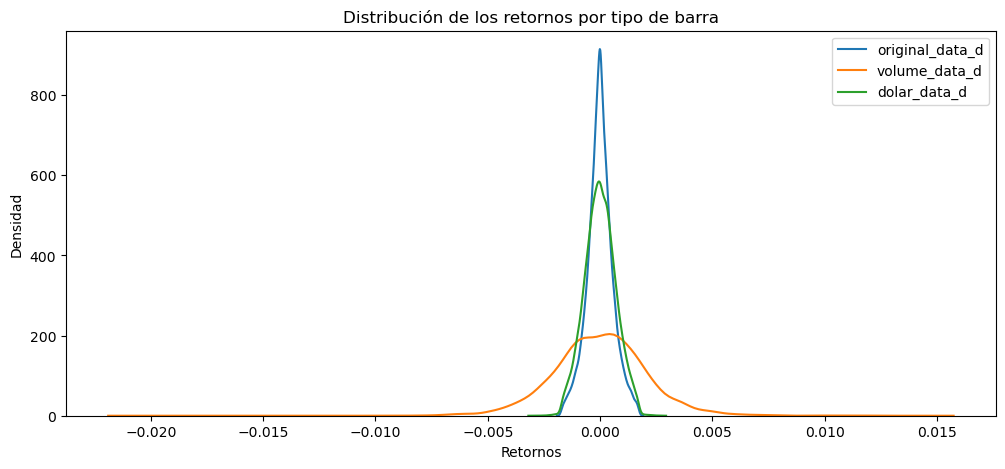

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
for name, df in datasets.items():
    sns.kdeplot(df['return'], label=name)
plt.title("Distribución de los retornos por tipo de barra")
plt.legend()
plt.xlabel("Retornos")
plt.ylabel("Densidad")
plt.show()


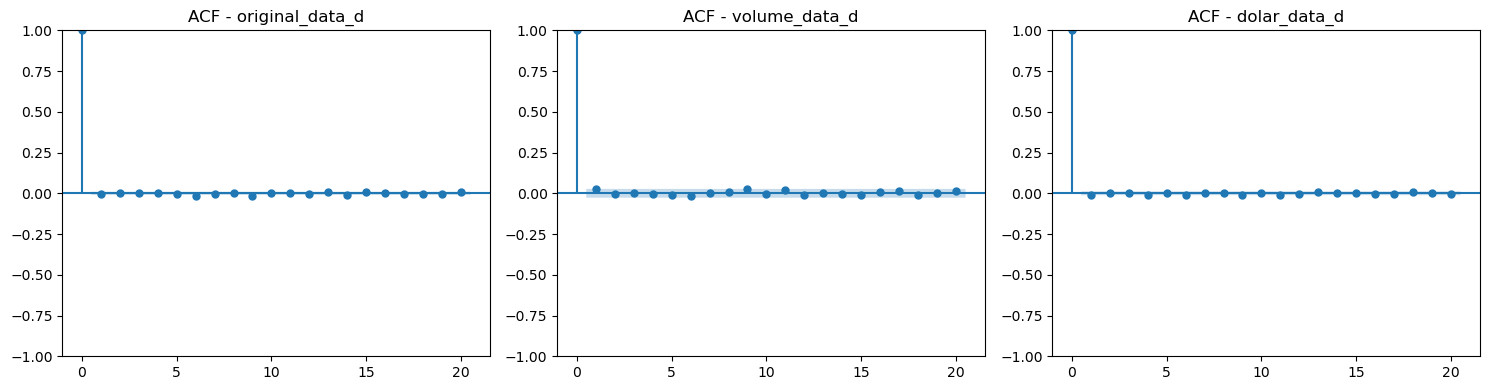

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, df) in zip(axes, datasets.items()):
    plot_acf(df['return'].dropna(), lags=20, ax=ax, title=f"ACF - {name}")
plt.tight_layout()
plt.show()


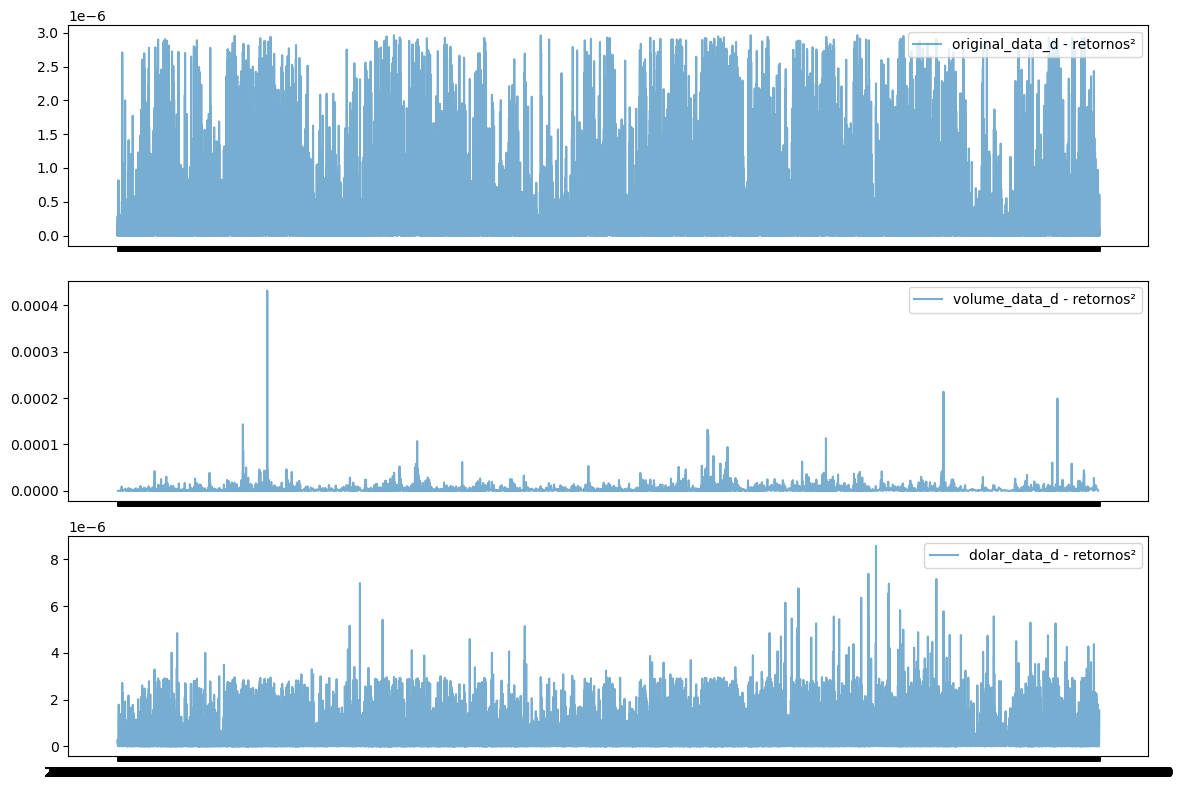

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
for ax, (name, df) in zip(axes, datasets.items()):
    ax.plot(df['open_time'], df['return']**2, label=f"{name} - retornos²", alpha=0.6)
    ax.legend()
plt.tight_layout()
plt.show()


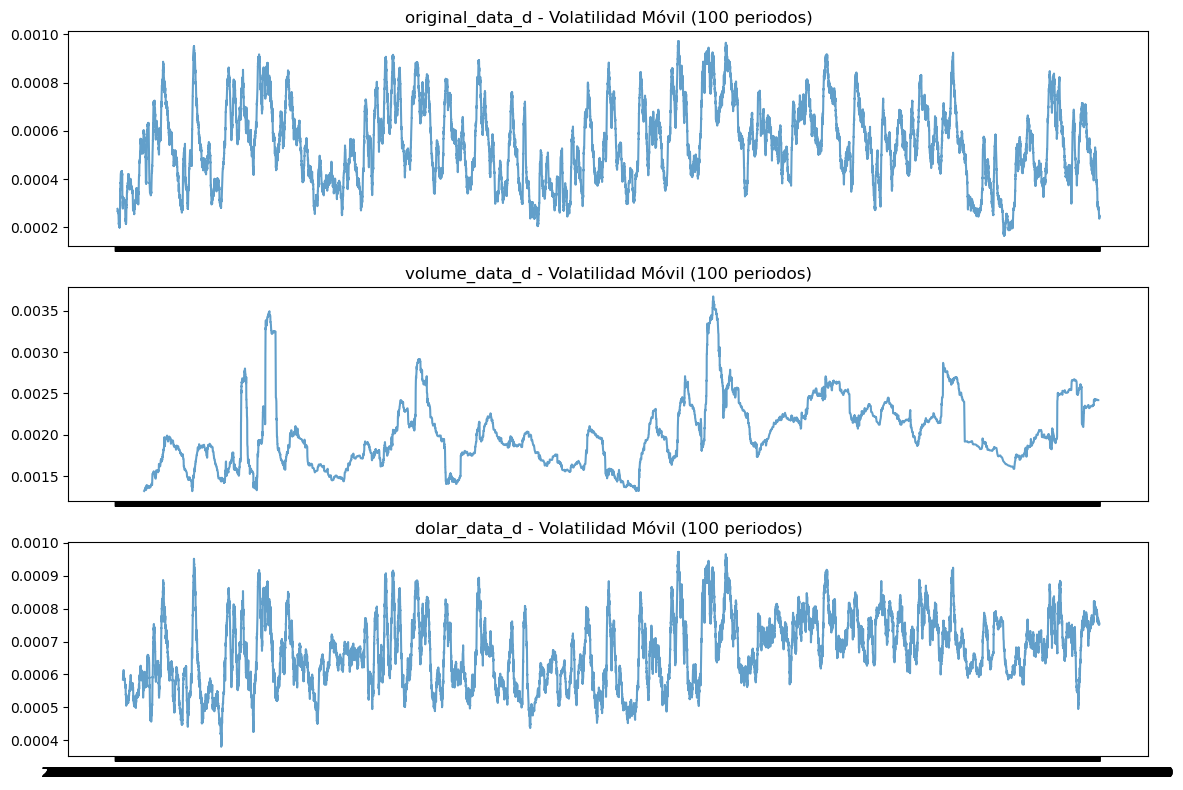

In [16]:
window = 100
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

for ax, (name, df) in zip(axes, datasets.items()):
    rolling_vol = df['return'].rolling(window).std()
    ax.plot(df['open_time'], rolling_vol, alpha=0.7)
    ax.set_title(f"{name} - Volatilidad Móvil ({window} periodos)")
plt.tight_layout()
plt.show()


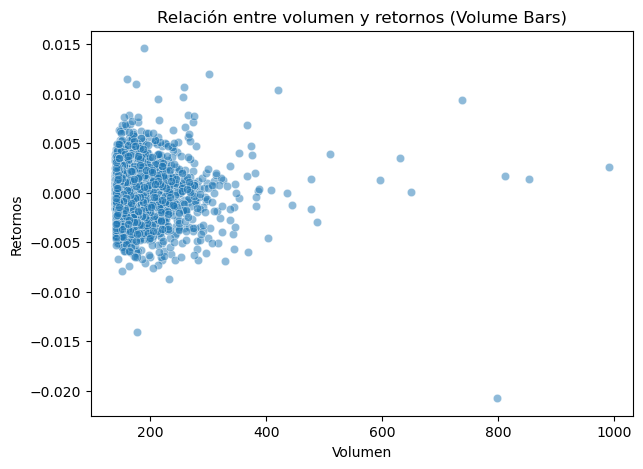

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='volume', y='return', data=volume_data, alpha=0.5)
plt.title("Relación entre volumen y retornos (Volume Bars)")
plt.xlabel("Volumen")
plt.ylabel("Retornos")
plt.show()


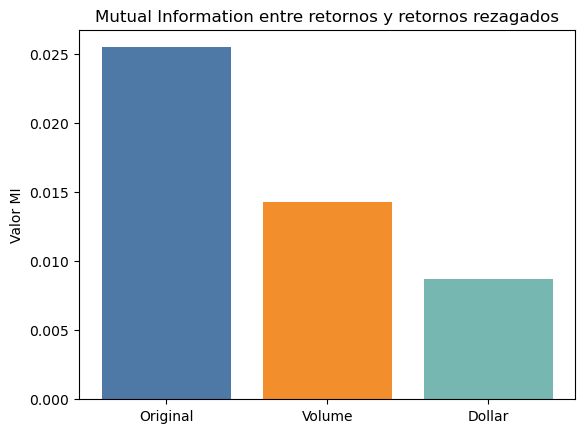

In [14]:
mi_values = {
    "Original": 0.025488,
    "Volume": 0.014274,
    "Dollar": 0.008713
}
plt.bar(mi_values.keys(), mi_values.values(), color=['#4E79A7','#F28E2B','#76B7B2'])
plt.title("Mutual Information entre retornos y retornos rezagados")
plt.ylabel("Valor MI")
plt.show()
